In [55]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import random
import itertools

In [7]:
X, y = load_digits(return_X_y=True)
# TODO: first task is to perform analysis on the data, we did the minimum, we might need to normalize the data, see links:
# i.e. the variance and scale subjects in the task
# https://scikit-learn.org/stable/modules/preprocessing.html
# https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

# dimension of the data
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

# print a sample and label
print(f"example of sample: \n{X[0]}")
print(f"example of label: {y[0]}")

X shape: (1797, 64)
y shape: (1797,)
example of sample: 
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
example of label: 0


### Features and sample analysis
We can see that the values of the features are pixels with values between 0 and 16.
Also, we can see that the labels are between 0 and 9 representing digits.
No need to normalize the data.

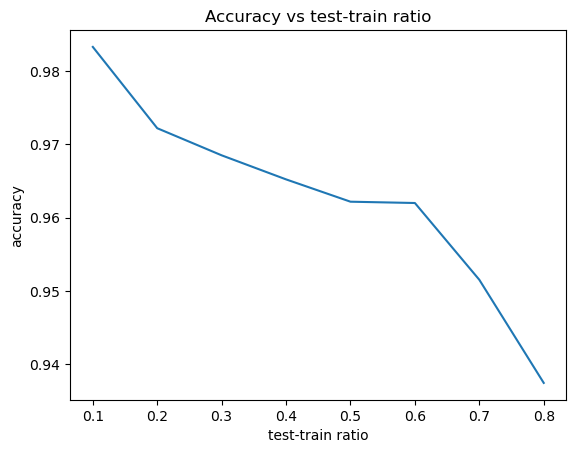

In [22]:
ratios = [0.1 * r for r in range(1, 9)]
accuracies = []
for r in ratios:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=r, random_state=1)
    regressor = LogisticRegression(max_iter=10000)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))
plt.plot(ratios, accuracies)
plt.xlabel("test-train ratio")
plt.ylabel("accuracy")
plt.title("Accuracy vs test-train ratio")
plt.show()

##### We can see that the accuracy is very high, but better on the lower ratios.

In [37]:
digits = load_digits(as_frame=True)
# create an unbalanced dataset with 1000 random samples
random.seed(1)
random_samples = random.sample(range(0, len(digits.data)), 1000)
X = digits.data.iloc[random_samples]
y = digits.target.iloc[random_samples]
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (1000, 64)
y shape: (1000,)


##### We can see that the data is unbalanced with 1000 samples chosen randomly.

In [38]:
# find l_min the number corresponding to the label with the least samples
l_min = y.value_counts().min()
print(f"l_min: {l_min}")

l_min: 91


In [49]:
# create a balanced dataset with l_min samples for each label
X_balanced = pd.DataFrame()
y_balanced = pd.Series(dtype="float64")
for label in y.unique():
    X_balanced = pd.concat([X_balanced, X[y == label].sample(l_min)])
    y_balanced = pd.concat([y_balanced, pd.Series([label] * l_min, dtype="float64")])
print(f"X_balanced shape: {X_balanced.shape}")
print(f"y_balanced shape: {y_balanced.shape}")

X_balanced shape: (910, 64)
y_balanced shape: (910,)


##### We can see that the data is balanced with l_min samples for each label.

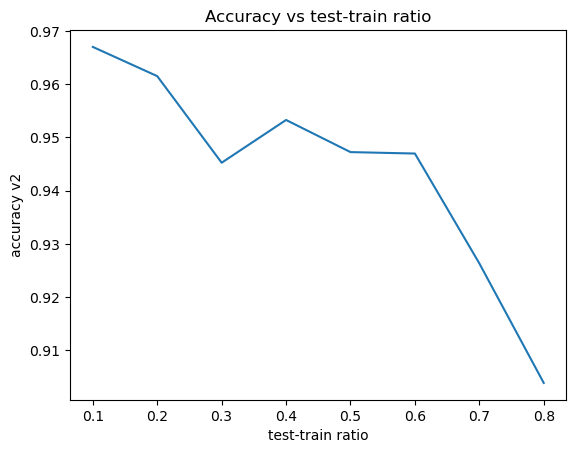

In [52]:
accuracies_v2 = []
for r in ratios:
    X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=r, random_state=1)
    regressor = LogisticRegression(max_iter=10000)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    accuracies_v2.append(accuracy_score(y_test, y_pred))
plt.plot(ratios, accuracies_v2)
plt.xlabel("test-train ratio")
plt.ylabel("accuracy v2")
plt.title("Accuracy vs test-train ratio")
plt.show()

In [61]:
# a function that gets train-set, test-set and k and returns the k-features from the dataset that achieve the highest accuracy
def get_k_best_features(X_train, X_test, y_train, y_test, k):
    indices_accuracy_dict = {}
    # generate all subsets of k features
    for subset in itertools.combinations(X_train.columns, k):
        regressor = LogisticRegression(max_iter=1000)
        regressor.fit(X_train[list(subset)], y_train)
        y_pred = regressor.predict(X_test[list(subset)])
        indices_accuracy_dict[subset] = accuracy_score(y_test, y_pred)
    # return the subset and accuracy with the highest accuracy
    best_subset = max(indices_accuracy_dict, key=indices_accuracy_dict.get)
    return best_subset, indices_accuracy_dict[best_subset]

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=1)
best_subset, best_accuracy = get_k_best_features(X_train, X_test, y_train, y_test, 2)
print(f"best subset: {best_subset}, accuracy: {best_accuracy}")

best subset: ('pixel_3_2', 'pixel_6_6'), accuracy: 0.4340659340659341


##### We can see that choosing only 2 features doesn't give us a good accuracy.